In [ ]:
#Importing Libraries

In [ ]:
import numpy as np
import pickle as pkl
import tensorflow as tf
from tensorflow.keras.applications.resnet50 import ResNet50,preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import GlobalMaxPool2D

from sklearn.neighbors import NearestNeighbors
import os
from numpy.linalg import norm

In [ ]:
#Extract Filenames from Folder

In [ ]:
# Define the path where images are stored
image_dir = "/content/drive/MyDrive/SEM 4/Deep Learning/Fashion_Recom_Model_Recent_Working_ON/fashion_dataset/fashion-dataset/fashion-dataset/images"

# Check if the directory exists
if not os.path.exists(image_dir):
    print(f"Error: Directory '{image_dir}' not found. Check the path.")
else:
    # List all image filenames
    filenames = [os.path.join(image_dir, file) for file in os.listdir(image_dir)]

    # Print some sample filenames
    print(f"Total Images: {len(filenames)}")
    print("Sample Image Paths:", filenames[:5])

Total Images: 28533
Sample Image Paths: ['/content/drive/MyDrive/SEM 4/Deep Learning/Fashion_Recom_Model_Recent_Working_ON/fashion_dataset/fashion-dataset/fashion-dataset/images/43466.jpg', '/content/drive/MyDrive/SEM 4/Deep Learning/Fashion_Recom_Model_Recent_Working_ON/fashion_dataset/fashion-dataset/fashion-dataset/images/43475.jpg', '/content/drive/MyDrive/SEM 4/Deep Learning/Fashion_Recom_Model_Recent_Working_ON/fashion_dataset/fashion-dataset/fashion-dataset/images/43477.jpg', '/content/drive/MyDrive/SEM 4/Deep Learning/Fashion_Recom_Model_Recent_Working_ON/fashion_dataset/fashion-dataset/fashion-dataset/images/4343.jpg', '/content/drive/MyDrive/SEM 4/Deep Learning/Fashion_Recom_Model_Recent_Working_ON/fashion_dataset/fashion-dataset/fashion-dataset/images/43479.jpg']


In [ ]:
len(filenames)

28533

In [ ]:
#Importing ResNet50 Model and Cofiguration

In [ ]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
import numpy as np

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import GlobalMaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
import numpy as np
import os
import pickle
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import cv2

# Load VGG16 as Feature Extractor
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224,224,3))
base_model.trainable = False  # Freeze layers

# Build Custom Model
model = Sequential([
    base_model,
    GlobalMaxPooling2D()
])

model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ (None, 7, 7, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_max_pooling2d_5               │ (None, 512)                 │               0 │
│ (GlobalMaxPooling2D)                 │                             │                 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 14,714,688 (56.13 MB)

In [ ]:
#Extracting Fetaures from Image

In [ ]:
# Load Image
img_path = "/content/drive/MyDrive/SEM 4/Deep Learning/Fashion_Recom_Model_Recent_Working_ON/fashion_dataset/fashion-dataset/fashion-dataset/images/16871.jpg"
img = image.load_img(img_path, target_size=(224,224))

# Convert to Array
img_array = image.img_to_array(img)

# Expand Dimensions (for batch processing)
img_expand_dim = np.expand_dims(img_array, axis=0)

# Preprocess for VGG16
img_preprocess = preprocess_input(img_expand_dim)

# Extract Features
result = model.predict(img_preprocess).flatten()

# Normalize Features
norm_result = result / np.linalg.norm(result)
norm_result

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 488ms/step


array([0.00000000e+00, 1.77262395e-04, 0.00000000e+00, 3.74381132e-02,
       1.56032993e-02, 9.78856385e-02, 0.00000000e+00, 1.26716301e-01,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 6.22295588e-03,
       0.00000000e+00, 0.00000000e+00, 4.94992621e-02, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 3.51443025e-03, 5.92543781e-02, 0.00000000e+00,
       2.11104862e-02, 0.00000000e+00, 3.90342548e-02, 0.00000000e+00,
       1.30772348e-02, 9.63546615e-03, 0.00000000e+00, 0.00000000e+00,
       4.59616929e-02, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 4.17681783e-03, 0.00000000e+00, 0.00000000e+00,
       8.75386521e-02, 0.00000000e+00, 8.57253850e-04, 0.00000000e+00,
       0.00000000e+00, 5.22927642e-02, 4.97234315e-02, 0.00000000e+00,
       1.68413684e-01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.27799958e-02, 3.17845196e-02, 0.00000000e+00, 1.23442831e-02,
      

In [ ]:
def extract_features_from_images(image_path, model):
    img = image.load_img(image_path, target_size=(224,224))
    img_array = image.img_to_array(img)
    img_expand_dim = np.expand_dims(img_array, axis=0)
    img_preprocess = preprocess_input(img_expand_dim)
    result = model.predict(img_preprocess).flatten()
    norm_result = result/norm(result)
    return norm_result

In [ ]:
extract_features_from_images(filenames[0], model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 385ms/step


array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       2.27405839e-02, 0.00000000e+00, 0.00000000e+00, 1.43511882e-02,
       9.21170488e-02, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       2.58418638e-02, 0.00000000e+00, 5.23317081e-04, 4.84403409e-03,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.29356086e-01,
       0.00000000e+00, 7.25404620e-02, 0.00000000e+00, 8.11922252e-02,
       3.93251423e-03, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.33733796e-02, 0.00000000e+00, 4.03143354e-02, 0.00000000e+00,
       3.57776433e-02, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.92267690e-02, 4.87242918e-03, 0.00000000e+00, 1.28621841e-02,
       3.85741964e-02, 1.68709997e-02, 2.32377145e-02, 3.07071745e-01,
       0.00000000e+00, 0.00000000e+00, 7.79255107e-02, 5.47536351e-02,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 2.17465609e-02,
       4.84823436e-02, 3.52444761e-02, 0.00000000e+00, 9.35766671e-04,
      

In [ ]:
image_features = []
for file in filenames[0:5]:
    image_features.append(extract_features_from_images(file, model))
image_features

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 388ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 501ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 538ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 514ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 405ms/step


[array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        2.27405839e-02, 0.00000000e+00, 0.00000000e+00, 1.43511882e-02,
        9.21170488e-02, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        2.58418638e-02, 0.00000000e+00, 5.23317081e-04, 4.84403409e-03,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.29356086e-01,
        0.00000000e+00, 7.25404620e-02, 0.00000000e+00, 8.11922252e-02,
        3.93251423e-03, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        1.33733796e-02, 0.00000000e+00, 4.03143354e-02, 0.00000000e+00,
        3.57776433e-02, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        1.92267690e-02, 4.87242918e-03, 0.00000000e+00, 1.28621841e-02,
        3.85741964e-02, 1.68709997e-02, 2.32377145e-02, 3.07071745e-01,
        0.00000000e+00, 0.00000000e+00, 7.79255107e-02, 5.47536351e-02,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 2.17465609e-02,
        4.84823436e-02, 3.52444761e-02, 0.00000000e+00, 9.357666

In [ ]:
Image_features = pkl.dump(image_features, open('/content/drive/MyDrive/SEM 4/Deep Learning/Fashion_Recom_Model_Recent_Working_ON/Images_features.pkl','wb'))

In [ ]:
filenames = pkl.dump(filenames, open('/content/drive/MyDrive/SEM 4/Deep Learning/Fashion_Recom_Model_Recent_Working_ON/filenames.pkl','wb'))

In [ ]:
#Loading Pickle Files

In [ ]:
Image_features = pkl.load(open('/content/drive/MyDrive/SEM 4/Deep Learning/Fashion_Recom_Model_Recent_Working_ON/Images_features.pkl','rb'))

In [ ]:
filenames = pkl.load(open('/content/drive/MyDrive/SEM 4/Deep Learning/Fashion_Recom_Model_Recent_Working_ON/filenames.pkl','rb'))

In [ ]:
np.array(Image_features).shape

(5, 512)

In [ ]:
#Finidng Simialar Images

In [ ]:
neighbors = NearestNeighbors(n_neighbors=6, algorithm='brute', metric='euclidean')

In [ ]:
neighbors.fit(Image_features)

NearestNeighbors(algorithm='brute', metric='euclidean', n_neighbors=6)

In [ ]:
input_image = extract_features_from_images('/content/drive/MyDrive/SEM 4/Deep Learning/Fashion_Recom_Model_Recent_Working_ON/fashion_dataset/fashion-dataset/fashion-dataset/images/16871.jpg',model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 386ms/step


In [ ]:
distance, indices = neighbors.kneighbors([input_image], n_neighbors=min(6, len(Image_features)))

In [ ]:
indices[0]

array([4, 2, 1, 3, 0])

In [ ]:
from IPython.display import Image

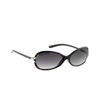

In [ ]:
from PIL import Image
import IPython.display as display

# Load image
image = Image.open("/content/drive/MyDrive/SEM 4/Deep Learning/Fashion_Recom_Model_Recent_Working_ON/fashion_dataset/fashion-dataset/fashion-dataset/images/16871.jpg")

# Resize image
image = image.resize((100, 100))  # Resize to 100x100 pixels

# Display image
display.display(image)

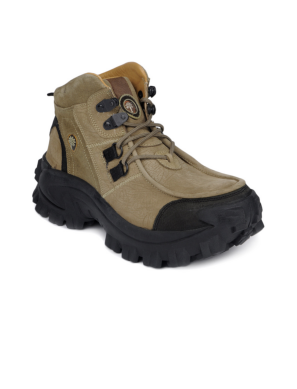

In [ ]:
import matplotlib.pyplot as plt
import cv2

# Load the second nearest neighbor's image
image_path = filenames[indices[0][1]]
image = cv2.imread(image_path)[:, :, ::-1]  # Convert BGR to RGB

# Show the image
plt.imshow(image)
plt.axis("off")  # Hide axes
plt.show()

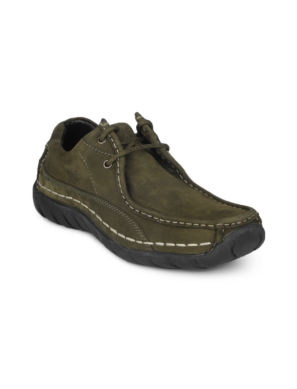

In [ ]:
import matplotlib.pyplot as plt
import cv2

# Load the second nearest neighbor's image
image_path = filenames[indices[0][2]]
image = cv2.imread(image_path)[:, :, ::-1]  # Convert BGR to RGB

# Show the image
plt.imshow(image)
plt.axis("off")  # Hide axes
plt.show()

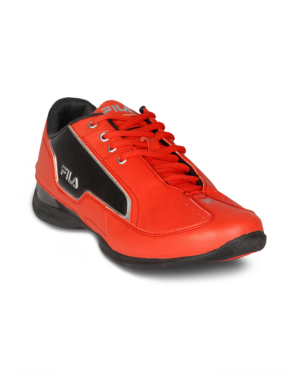

In [ ]:
import matplotlib.pyplot as plt
import cv2

# Load the second nearest neighbor's image
image_path = filenames[indices[0][3]]
image = cv2.imread(image_path)[:, :, ::-1]  # Convert BGR to RGB

# Show the image
plt.imshow(image)
plt.axis("off")  # Hide axes
plt.show()

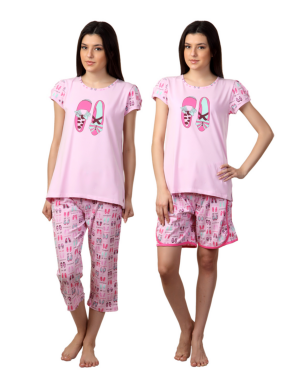

In [ ]:
import matplotlib.pyplot as plt
import cv2

# Load the second nearest neighbor's image
image_path = filenames[indices[0][4]]
image = cv2.imread(image_path)[:, :, ::-1]  # Convert BGR to RGB

# Show the image
plt.imshow(image)
plt.axis("off")  # Hide axes
plt.show()

## StreamLit Section

In [ ]:
!ngrok authtoken 2fqzuEv0TQoFtPbSveFL8B0S9XU_7MURCqE9acbJ4wQa15hCe #YOUR_AUTH_TOKEN

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [ ]:
from pyngrok import ngrok

# Open an HTTP tunnel on port 8501
ngrok_tunnel = ngrok.connect(8501)

In [ ]:
!wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-windows-amd64.zip

--2025-02-23 10:05:41--  https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-windows-amd64.zip
Resolving bin.equinox.io (bin.equinox.io)... 99.83.220.108, 13.248.244.96, 75.2.60.68, ...
Connecting to bin.equinox.io (bin.equinox.io)|99.83.220.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14091962 (13M) [application/octet-stream]
Saving to: ‘ngrok-stable-windows-amd64.zip.2’

ngrok-stable-window 100%[===================>]  13.44M  21.5MB/s    in 0.6s    

2025-02-23 10:05:41 (21.5 MB/s) - ‘ngrok-stable-windows-amd64.zip.2’ saved [14091962/14091962]



In [ ]:
!unzip ngrok-stable-windows-amd64.zip

Archive:  ngrok-stable-windows-amd64.zip
replace ngrok.exe? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: ngrok.exe               


In [ ]:
!./ngrok http 8501

/bin/bash: line 1: ./ngrok: No such file or directory


In [ ]:
!wget -q -O - ipv4.icanhazip.com

34.134.101.93


In [ ]:
!streamlit run "/content/drive/MyDrive/SEM 4/Deep Learning/Fashion_Recom_Model_Recent_Working_ON/app.py" & npx localtunnel --port 8501

⠙⠹

⠸⠼⠴⠦
  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.134.101.93:8501

your url is: https://cool-wasps-itch.loca.lt
  Stopping...
^C
